Einlesen der Daten.

In [194]:
import pandas as pd
import numpy as np
from sklearn import neural_network
from sklearn.datasets import load_iris
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, train_test_split
import matplotlib.pyplot as plt
import pygwalker as pyg

import time
import copy
from os import listdir
import os
from os.path import isfile, join

print("helo")
folder="data"


helo


Daten zusammenführen:

Filtern der Daten

prepocessing. Zuerst schauen wir uns nur die numerischen Felder an. Andere Interessante Felder sind eventuell:
Datetime (für Zeitreihen)
Stopfault?
Auch unvollständige Spalten wurden erstmal gelöscht.

In [195]:
myfeather="data/Windpark_A_1.feather"
df=pd.read_feather(myfeather)
df.dropna(axis=1,inplace=True,how="all") 
df=df.select_dtypes(include="number")
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)
col=df.pop("Fehlernummer")
df.insert(len(df.columns), "Fehlernummer", col)
df=df.fillna(df.mean())
cols_to_remove="Spannung L2-N","Spannung L3-N","Strom L2","Strom L3","Pitch Angle 2 (avg)","Pitch Angle 3 (avg)","Max. Operatingstate","T Hydraulic Oil", "T Gear Oil", "T Generator Cooling Water", "T Spin", "High Voltage Trafo Phase 2 Temperature (avg)", "High Voltage Trafo Phase 3 Temperature (avg)","Generatordrehzahl Max", "Generatordrehzahl Min", "Blindleistung Max", "Blindleistung Min", "Active Power Reference Value", "Reactive Power Reference Value", "Statortemperatur L2", "Statortemperatur L3", "t (Total)", "Grid Possible Power (avg)", "T Generator Bearing DE", "T Generator Bearing NDE"
# for col in cols_to_remove:
#     df.pop(col)
# df.head()


In [196]:
print(df.shape)
scaler = preprocessing.StandardScaler().fit(df.iloc[:,:-1])
df.iloc[:,:-1] = scaler.transform(df.iloc[:,:-1])
lab = preprocessing.LabelEncoder()
df.iloc[:,-1] = lab.fit_transform(df.iloc[:,-1])
# print(df.shape)
# df.describe()

(286884, 113)


In [197]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def create_randomforest_classifier(df,n_estimators=100,max_depth=None,random_state=56,plot_decisionboundary=True):
    x_ges=df.iloc[:,:-1].to_numpy()
    # x_ges=preprocessing.normalize(x_ges)
    y_ges=df.iloc[:,-1].to_numpy()
    # lab = preprocessing.LabelEncoder()
    # y_ges = lab.fit_transform(y_ges)
    x_train,x_test,y_train,y_test=train_test_split(x_ges,y_ges,test_size=0.2,random_state=random_state)
    clf=RandomForestClassifier(n_estimators=n_estimators,max_depth=max_depth,random_state=random_state)
    clf.fit(x_train,y_train)
    
    train_accu = 100*clf.score(x_train,y_train)
    test_accu = 100*clf.score(x_test,y_test)
    # print(cross_val_score(clf,x_ges,y_ges,cv=10,scoring="accuracy"))
    
    print("train accuracy: {} %".format(train_accu))
    print("test accuracy: {} %".format(test_accu))
    # cm = confusion_matrix(y_test, y_prediction_test)
    # print(cm)
    # report=classification_report(lab.inverse_transform(y_test), lab.inverse_transform(y_prediction_test), digits=4)
    # plt.show()
    return clf,train_accu,test_accu
# random_tree=create_randomforest_classifier(df,max_depth=30,n_estimators=4)[0]

In [198]:
def create_randomforest_classifier(df,n_estimators=100,max_depth=None,random_state=56,plot_decisionboundary=True):
    x_ges=df.iloc[:,:-1].to_numpy()
    # x_ges=preprocessing.normalize(x_ges)
    y_ges=df.iloc[:,-1].to_numpy()
    # lab = preprocessing.LabelEncoder()
    # y_ges = lab.fit_transform(y_ges)
    x_train,x_test,y_train,y_test=train_test_split(x_ges,y_ges,test_size=0.2,random_state=random_state)
    clf=RandomForestClassifier(n_estimators=n_estimators,max_depth=max_depth,random_state=random_state)
    clf.fit(x_train,y_train)
    y_prediction_test   =   clf.predict(x_test)

    train_accu = 100*clf.score(x_train,y_train)
    test_accu = 100*clf.score(x_test,y_test)
    
    print("train accuracy: {} %".format(train_accu))
    print("test accuracy: {} %".format(test_accu))
    # cm = confusion_matrix(y_test, y_prediction_test)
    # print(cm)
    # report=classification_report(lab.inverse_transform(y_test), lab.inverse_transform(y_prediction_test), digits=4)
    # plt.show()
    return clf,train_accu,test_accu
# random_tree=create_randomforest_classifier(df,max_depth=30,n_estimators=4)[0]

In [199]:
def compute_decisiontree_classifier(df: pd.DataFrame,max_depth=None,random_state=23):
    # Start of your Code 
    x_ges=df.iloc[:,0:-1].to_numpy()
    y_ges=df.iloc[:,-1].to_numpy()
    x_train,x_test,y_train,y_test=train_test_split(x_ges,y_ges,test_size=0.2,random_state=random_state)
    
    clf=tree.DecisionTreeClassifier(max_depth=max_depth,random_state=random_state)
    clf.fit(x_train,y_train)
    y_prediction_train=clf.predict(x_train)
    y_prediction_test=clf.predict(x_test)
    # End of your Code
    
    train_accu = 100*clf.score(x_train,y_train)
    test_accu = 100*clf.score(x_test,y_test)
    
    print("train accuracy: {} %".format(train_accu))
    print("test accuracy: {} %".format(test_accu))
    
    # cm = confusion_matrix(y_test, y_prediction_test)
    # print(cm)
    # print(classification_report(lab.inverse_transform(y_test), lab.inverse_transform(y_prediction_test), digits=4))
    # plt.show()
    return clf,train_accu,test_accu


# decision_tree=compute_decisiontree_classifier(df,max_depth=30)[0]
# print("depth=",decision_tree.get_depth())



In [200]:
from sklearn.metrics import ConfusionMatrixDisplay


def compute_decisiontree_classifier_tree_and_cm(df: pd.DataFrame, max_depth=None, random_state=23):
    # Start of your Code
    x_ges = df.iloc[:, :-1].to_numpy()
    y_ges = df.iloc[:, -1].to_numpy()
    # y_ges = lab.fit_transform(y_ges)
    x_train, x_test, y_train, y_test = train_test_split(
        x_ges, y_ges, test_size=0.2, random_state=random_state)
    clf = tree.DecisionTreeClassifier(
        max_depth=max_depth, random_state=random_state)
    clf.fit(x_train, y_train)
    y_prediction_train = clf.predict(x_train)
    y_prediction_test = clf.predict(x_test)

    train_accu = 100*clf.score(x_train, y_train)
    test_accu = 100*clf.score(x_test, y_test)

    print("train accuracy: {} %".format(train_accu))
    print("test accuracy: {} %".format(test_accu))

    # f,ax = plt.subplots(1,1,figsize=(50,50))
    # disp=ConfusionMatrixDisplay.from_predictions(lab.inverse_transform(y_test), lab.inverse_transform(y_prediction_test), ax=ax)
    # print(len(lab.classes_))
    # disp.plot()
    # plt.show()
    # print(classification_report(lab.inverse_transform(y_test),
    #       lab.inverse_transform(y_prediction_test), digits=4))
    print(classification_report(y_train,y_prediction_train,digits=4))
    print(classification_report(y_test,y_prediction_test,digits=4))
    plt.show()
    return clf, train_accu, test_accu


# compute_decisiontree_classifier_tree_and_cm(df, max_depth=20)

train accuracy: 99.97080699063645 %
test accuracy: 99.45971382261185 %


c:\Users\T470\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\T470\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\T470\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

           0     0.9998    1.0000    0.9999    216056
           1     1.0000    1.0000    1.0000        17
           2     1.0000    1.0000    1.0000         2
           3     1.0000    1.0000    1.0000         4
           4     1.0000    1.0000    1.0000         7
           5     1.0000    1.0000    1.0000         2
           6     1.0000    1.0000    1.0000         1
           7     1.0000    1.0000    1.0000         2
           8     1.0000    0.9286    0.9630        14
           9     0.9970    0.9973    0.9971      2972
          10     0.9999    0.9984    0.9991      6870
          11     1.0000    1.0000    1.0000         2
          12     1.0000    0.8571    0.9231         7
          13     1.0000    1.0000    1.0000         2
          14     1.0000    0.8571    0.9231        21
          15     1.0000    1.0000    1.0000         6
          16     0.0000    0.0000    0.0000         1
          17     0.9963    

c:\Users\T470\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\T470\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\T470\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

(DecisionTreeClassifier(max_depth=20, random_state=23),
 99.97080699063645,
 99.45971382261185)

In [201]:
random_tree=create_randomforest_classifier(df,max_depth=30,n_estimators=4)[0]
# df[df["Fehlernummer"]==202]

train accuracy: 99.89368515992976 %
test accuracy: 99.41788521533019 %
[[54005     0     0 ...     0     0     0]
 [    0     0     0 ...     0     0     0]
 [    0     0     0 ...     0     0     0]
 ...
 [    0     0     0 ...    21     0     0]
 [    0     0     0 ...     0     1     0]
 [    1     0     0 ...     1     0     7]]


c:\Users\T470\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\T470\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\T470\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

test accuracy: 96.675 % with 20000 samples
87.5% for df
90% with df.fillna(df.mean())


In [202]:
x_ges=df.iloc[:20000,0:-1].to_numpy()
df.iloc[:,-1] = lab.inverse_transform(df.iloc[:,-1])
y_ges=df.iloc[:20000,-1].to_numpy()
lab2 = preprocessing.LabelEncoder()
y_labeled = lab2.fit_transform(y_ges)
df.iloc[:,-1] = lab.fit_transform(df.iloc[:,-1])
x_train,x_test,y_train,y_test=train_test_split(x_ges,y_labeled,test_size=0.2,random_state=0)


In [203]:
def compute_naive_bayes():
    from sklearn import naive_bayes
    # smoothies=[1e-9,1e-8,1e-7,1e-6,1e-5,0.0001,0.001,0.01,0.1,0.2,0.4,0.7]
    # for sm in smoothies:
    clf=naive_bayes.GaussianNB(var_smoothing=0.001)
    clf.fit(x_train,y_train)
    y_prediction_train=clf.predict(x_train)
    y_prediction_test=clf.predict(x_test)
    # End of your Code

    train_accu = 100*clf.score(x_train,y_train)
    test_accu = 100*clf.score(x_test,y_test)
    
    print("train accuracy: {} %".format(train_accu))
    print("test accuracy: {} %".format(test_accu))

smoothies=[1e-9,1e-8,1e-7,1e-6,1e-5,0.0001,0.001,0.01,0.1,0.2,0.4,0.7]
train accuracy: -2192.556093076199 %
test accuracy: -2192.5259176239842 %
train accuracy: -2086.032003152157 %
test accuracy: -2081.803376295881 %
train accuracy: -1947.1019854212727 %
test accuracy: -1944.5205239562902 %
train accuracy: -1765.812227743362 %
test accuracy: -1758.7804707200896 %
train accuracy: -1511.9484272048685 %
test accuracy: -1509.8294340151301 %
train accuracy: -1101.2004465556115 %
test accuracy: -1096.8898851218828 %
0.001:
train accuracy: -693.2889696385964 %
test accuracy: -694.0547072008966 %
train accuracy: -1188.875511678305 %
test accuracy: -1182.9539086578875 %
train accuracy: -2460.273186962327 %
test accuracy: -2459.645558980106 %
train accuracy: -2709.032243941948 %
test accuracy: -2709.5895208741945 %
train accuracy: -2870.4428343147342 %
test accuracy: -2870.0844073970297 %
train accuracy: -2939.858152923407 %
test accuracy: -2944.0897310170917 %

In [204]:
def compute_svm():
    from sklearn import svm
    kernels=['linear', 'poly', 'rbf', 'sigmoid']
    for kern in kernels:
        clf=svm.SVC(kernel=kern,cache_size=200,random_state=0)
        clf.fit(x_train,y_train)
        y_prediction_train=clf.predict(x_train)
        y_prediction_test=clf.predict(x_test)

        train_accu = 100 - np.mean(np.abs(y_prediction_train - y_train)) * 100
        test_accu = 100 - np.mean(np.abs(y_prediction_test - y_test)) * 100
        print(kern)
        print("train accuracy: {} %".format(train_accu))
        print("test accuracy: {} %".format(test_accu))
# compute_svm()

In [205]:
def compute_nearest_neighbors():
    from sklearn.neighbors import NearestNeighbors

    clf = NearestNeighbors(n_neighbors=1, algorithm='ball_tree')
    #sample
    sample_size=1000
    print("sample size =",sample_size)
    sample=df.sample(sample_size)
    x_ges=sample.iloc[:,:-1]
    y_ges=sample.iloc[:,-1]
    y_labeled = lab.fit_transform(y_ges)
    x_train,x_test,y_train,y_test=train_test_split(x_ges,y_labeled,test_size=0.2,random_state=0)

    #fit
    clf.fit(x_train)
    distances, indices = clf.kneighbors(x_train)
    y_prediction_train=[]
    for i in indices[:,0]:
        try:
            y_prediction_train.append(y_train[i])
        except:
            pass
    distances, indices = clf.kneighbors(x_test)
    y_prediction_test=[]
    for i in indices[:,0]:
        try:
            y_prediction_test.append(y_train[i]) # TODO
        except:
            pass  
    # End of your Code
    train_accu = 100 - np.mean(np.abs(y_prediction_train - y_train[:len(y_prediction_train)])) * 100
    test_accu = 100 - np.mean(np.abs(y_prediction_test - y_test[:len(y_prediction_test)])) * 100
    print("train rating: {} %".format(train_accu))
    print("test rating: {} %".format(test_accu))


In [206]:
def compute_nearest_centroid():
    from sklearn.neighbors import NearestCentroid
    mylist = ["euclidean", "manhattan", "l2"]
    for meep in mylist:
        clf = NearestCentroid(metric=meep)
        clf.fit(x_train, y_train)
        print(clf.score(x_train, y_train))
        y_prediction_train = clf.predict(x_train)
        y_prediction_test = clf.predict(x_test)
        print(x_test.shape)
        # End of your Code

        train_accu = 100*clf.score(x_train,y_train)
        test_accu = 100*clf.score(x_test,y_test)
        
        print("train accuracy: {} %".format(train_accu))
        print("test accuracy: {} %".format(test_accu))

In [207]:
def compute_perceptron():
    from sklearn.linear_model import Perceptron
    clf = Perceptron(penalty="l2")
    clf.partial_fit(x_train, y_train, classes=np.unique(y_train))
    # clf.fit(x_train,y_train)
    print("x_test.shape=", x_test.shape)
    # End of your Code

    train_accu = 100*clf.score(x_train,y_train)
    test_accu = 100*clf.score(x_test,y_test)
    
    print("train accuracy: {} %".format(train_accu))
    print("test accuracy: {} %".format(test_accu))

In [208]:
def compute_mlp():
    mlp=neural_network.MLPClassifier(max_iter=1000)
    mlp.fit(x_train,y_train)
    print("trainacc=",100*mlp.score(x_train,y_train))
    print("testacc=",100*mlp.score(x_test,y_test))
# compute_mlp()

trainacc= 0.997625
testacc= 0.993


In [209]:
def compute_all_small_data():
    print(x_train.shape)
    print("randomforest")
    create_randomforest_classifier(df, n_estimators=5, max_depth=15)
    print("decision_tree")
    compute_decisiontree_classifier(df)
    print("naive_bayes")
    compute_naive_bayes()
    print("svm")
    compute_svm()
    print("nearest_neighbors")
    compute_nearest_neighbors()
    print("nearest_centroid")
    compute_nearest_centroid()
    print("perceptron")
    compute_perceptron()
    compute_mlp()
compute_all_small_data()

(16000, 112)
randomforest
train accuracy: 99.7751702562449 %
test accuracy: 99.46668525715879 %
[[54010     0     0 ...     0     0     0]
 [    2     0     0 ...     0     0     0]
 [    0     0     0 ...     0     0     0]
 ...
 [    0     0     0 ...    21     0     0]
 [    0     0     0 ...     0     1     0]
 [    0     0     0 ...     0     0     9]]


c:\Users\T470\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\T470\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\T470\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

decision_tree
train accuracy: 100.0 %
test accuracy: 99.45448524670164 %
naive_bayes
train accuracy: 84.65 %
test accuracy: 85.55 %
svm
linear
train accuracy: 95.33125 %
test accuracy: 95.65 %
poly
train accuracy: 94.6375 %
test accuracy: 95.825 %
rbf
train accuracy: 94.36875 %
test accuracy: 95.125 %
sigmoid
train accuracy: 66.5625 %
test accuracy: 71.225 %
nearest_neighbors
sample size = 1000
train rating: 100.0 %
test rating: 97.0 %
nearest_centroid
0.54
(4000, 112)
train accuracy: 54.0 %
test accuracy: 54.800000000000004 %
0.5239375
(4000, 112)
train accuracy: 52.39375 %
test accuracy: 53.05 %


c:\Users\T470\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\T470\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


0.54
(4000, 112)
train accuracy: 54.0 %
test accuracy: 54.800000000000004 %
perceptron
x_test.shape= (4000, 112)
train accuracy: 94.85625 %
test accuracy: 95.55 %
trainacc= 0.99825
testacc= 0.99425


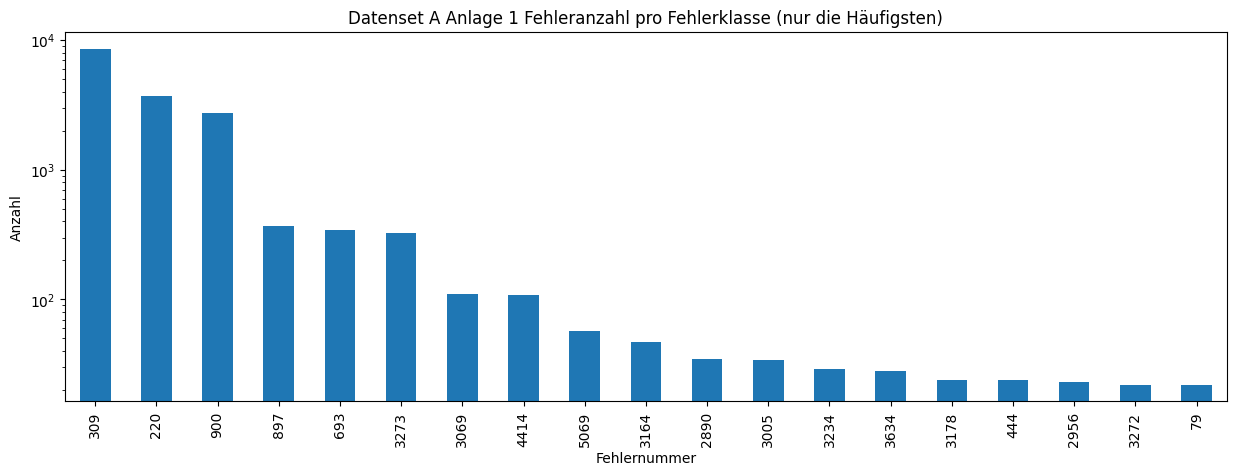

In [214]:
df_whole=pd.read_feather(myfeather)
fehlers=df_whole["Fehlernummer"].value_counts().head(20).drop(0)

fig, ax = plt.subplots()
fehlers.plot(kind="bar")
fig.set_figwidth(15)
plt.yscale("log")
ax.set_xlabel("Fehlernummer")
ax.set_ylabel('Anzahl')
ax.set_title('Datenset A Anlage 1 Fehleranzahl pro Fehlerklasse (nur die Häufigsten)')
ax.barh 
plt.show()

train accuracy: 99.57343349004606 %
test accuracy: 99.42485664987713 %


c:\Users\T470\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\T470\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\T470\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

           0     0.9983    0.9998    0.9990    216056
          79     1.0000    0.1176    0.2105        17
         127     1.0000    1.0000    1.0000         2
         135     0.6000    0.7500    0.6667         4
         144     1.0000    0.2857    0.4444         7
         195     0.0000    0.0000    0.0000         2
         202     0.0000    0.0000    0.0000         1
         204     1.0000    1.0000    1.0000         2
         214     0.0000    0.0000    0.0000        14
         220     0.9150    0.9384    0.9266      2972
         309     0.9707    0.9786    0.9746      6870
         315     0.0000    0.0000    0.0000         2
         356     1.0000    0.1429    0.2500         7
         416     0.0000    0.0000    0.0000         2
         444     0.3333    0.0476    0.0833        21
         604     1.0000    0.1667    0.2857         6
         691     0.0000    0.0000    0.0000         1
         693     0.9091    

c:\Users\T470\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\T470\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


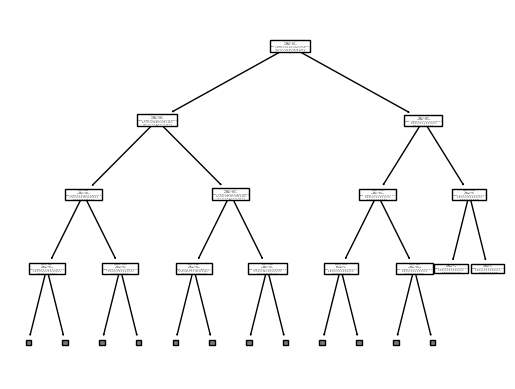

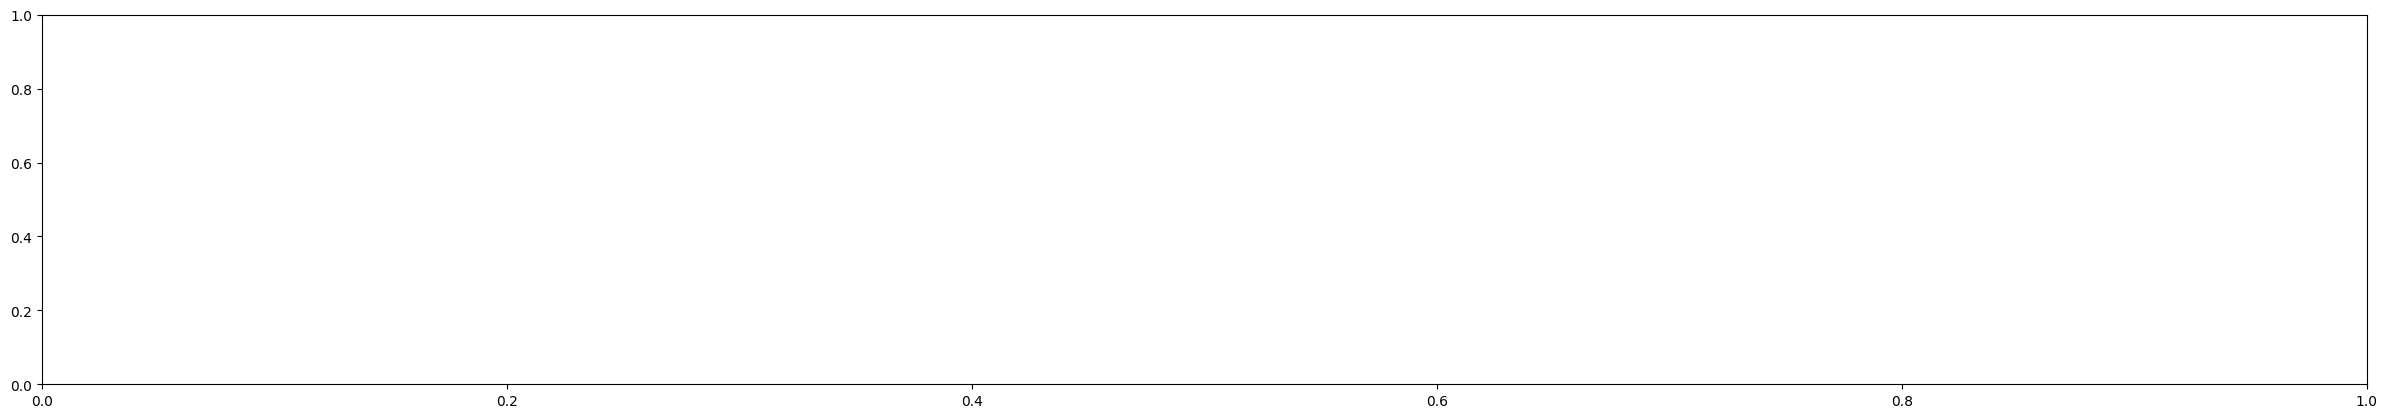

In [219]:
#classification report
df=pd.read_feather(myfeather)
df.dropna(axis=1,inplace=True,how="all") 
df=df.select_dtypes(include="number")
col=df.pop('Fehlernummer')
df.insert(len(df.columns), 'Fehlernummer', col)
df=df.copy()
# print("fillna:",time.time()-start)
df=df.fillna(df.mean())
# print("scaling:",time.time()-start)
scaler = preprocessing.StandardScaler().fit(df.iloc[:,:-1])
df.iloc[:,:-1] = scaler.transform(df.iloc[:,:-1])
mytree,b,c=compute_decisiontree_classifier_tree_and_cm(df,max_depth=10)

tree.plot_tree(mytree,max_depth=3)
fig, ax = plt.subplots()
fig.set_figwidth(30)
plt.show()


In [ ]:
create_randomforest_classifier(df,n_estimators=4,max_depth=30,random_state=0)

train accuracy: 99.90457807387139 %
test accuracy: 99.54337103717518 %
[[54037     0     0 ...     0     0     0]
 [    0     0     0 ...     0     0     0]
 [    0     0     0 ...     0     0     0]
 ...
 [    0     0     0 ...    17     0     0]
 [    0     0     0 ...     0     2     0]
 [    0     0     0 ...     0     0    15]]


c:\Users\T470\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\T470\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\T470\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

(RandomForestClassifier(max_depth=30, n_estimators=4, random_state=0),
 99.90457807387139,
 99.54337103717518)

In [ ]:
import re
import os

def compute_all_decisiontrees():
    cols_to_remove="Spannung L2-N","Spannung L3-N","Strom L2","Strom L3","Pitch Angle 2 (avg)","Pitch Angle 3 (avg)","Max. Operatingstate","T Hydraulic Oil", "T Gear Oil", "T Generator Cooling Water", "T Spin", "High Voltage Trafo Phase 2 Temperature (avg)", "High Voltage Trafo Phase 3 Temperature (avg)","Generatordrehzahl Max", "Generatordrehzahl Min", "Blindleistung Max", "Blindleistung Min", "Active Power Reference Value", "Reactive Power Reference Value", "Statortemperatur L2", "Statortemperatur L3", "t (Total)", "Grid Possible Power (avg)", "T Generator Bearing DE", "T Generator Bearing NDE"
    print(os.getcwd())
    feathers = ["./data/"+fn for fn in os.listdir("./data/")
              if fn.endswith(".feather")]
    

    print(feathers)
    # feathers.pop(0)
    for feather in feathers:
        start=time.time()
        print(feather)
        df=pd.read_feather(feather)
        df.dropna(axis=1,inplace=True,how="all") 
        df=df.select_dtypes(include="number")
        col=df.pop('Fehlernummer')
        df.insert(len(df.columns), 'Fehlernummer', col)
        df=df.copy()
        # print("fillna:",time.time()-start)
        df=df.fillna(df.mean())
        # print("scaling:",time.time()-start)
        scaler = preprocessing.StandardScaler().fit(df.iloc[:,:-1])
        df.iloc[:,:-1] = scaler.transform(df.iloc[:,:-1])
        # print("encoding:",time.time()-start)
        lab = preprocessing.LabelEncoder()
        df.iloc[:,-1] = lab.fit_transform(df.iloc[:,-1])
        # print("remove cols:",time.time()-start)
        # for col in cols_to_remove:
        #     df.drop(col,axis=1,inplace=True)
        # print("doing something",time.time()-start)
        classifiers,acc1,acc2=create_randomforest_classifier(df,n_estimators=4,max_depth=30,random_state=0)
compute_all_decisiontrees()

c:\Users\T470\Documents\GitHub\Data-Science\task
['./data/Windpark_A_1.feather', './data/Windpark_A_2.feather', './data/Windpark_A_3.feather', './data/Windpark_A_4.feather', './data/Windpark_A_5.feather', './data/Windpark_A_6.feather', './data/Windpark_A_7.feather', './data/Windpark_A_8.feather', './data/Windpark_B_1.feather', './data/Windpark_B_2.feather', './data/Windpark_B_3.feather', './data/Windpark_B_4.feather', './data/Windpark_C_1.feather', './data/Windpark_C_10.feather', './data/Windpark_C_11.feather', './data/Windpark_C_12.feather', './data/Windpark_C_2.feather', './data/Windpark_C_3.feather', './data/Windpark_C_4.feather', './data/Windpark_C_5.feather', './data/Windpark_C_6.feather', './data/Windpark_C_7.feather', './data/Windpark_C_8.feather', './data/Windpark_C_9.feather', './data/Windpark_D_1.feather', './data/Windpark_D_10.feather', './data/Windpark_D_11.feather', './data/Windpark_D_12.feather', './data/Windpark_D_2.feather', './data/Windpark_D_3.feather', './data/Windpa

train accuracy: 99.90457807387139 %
test accuracy: 99.54337103717518 %
[[54037     0     0 ...     0     0     0]
 [    0     0     0 ...     0     0     0]
 [    0     0     0 ...     0     0     0]
 ...
 [    0     0     0 ...    17     0     0]
 [    0     0     0 ...     0     2     0]
 [    0     0     0 ...     0     0    15]]
./data/Windpark_A_2.feather


c:\Users\T470\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\T470\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\T470\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

train accuracy: 99.90631088150953 %
test accuracy: 99.49390585598206 %
[[54069     0     1 ...     0     0     0]
 [    0     0     0 ...     0     0     0]
 [    1     0     0 ...     0     0     0]
 ...
 [    0     0     0 ...     0     0     0]
 [    0     0     0 ...     0     4     0]
 [    0     0     0 ...     0     0    14]]
./data/Windpark_A_3.feather


c:\Users\T470\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\T470\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\T470\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

train accuracy: 99.8918336603139 %
test accuracy: 99.38692217414913 %
[[52650     0     0 ...     0     0     0]
 [    1     1     0 ...     0     0     0]
 [    1     0    17 ...     0     0     0]
 ...
 [    1     0     0 ...     1     0     0]
 [    0     0     0 ...     0    22     0]
 [    0     0     0 ...     0     0     1]]
./data/Windpark_A_4.feather


c:\Users\T470\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\T470\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\T470\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

train accuracy: 99.89452723254338 %
test accuracy: 99.50808766893074 %
[[54026     1     0 ...     0     0     0]
 [    0     1     0 ...     0     0     0]
 [    0     0    17 ...     0     0     0]
 ...
 [    0     0     0 ...    84     0     0]
 [    0     0     0 ...     0     3     0]
 [    0     0     0 ...     0     0     0]]
./data/Windpark_A_5.feather


c:\Users\T470\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\T470\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\T470\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

train accuracy: 99.89381959862054 %
test accuracy: 99.41557415890064 %
[[53992     0     0 ...     0     0     0]
 [    0     3     0 ...     0     0     0]
 [    1     0     0 ...     0     0     0]
 ...
 [    1     0     0 ...    24     0     0]
 [    0     0     0 ...     0     6     0]
 [    0     0     0 ...     0     0     1]]


ValueError: y contains previously unseen labels: [54]